<a href="https://colab.research.google.com/github/E1250/CNN-CV_Projects_CaseStudy/blob/main/Deep_CNN_IMG_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Deep CNN Image Classifier to Classify any image
this is a Youtube Video Course by - Nicolas Renotte - one of the best Youtube channels - https://www.youtube.com/watch?v=jztwpsIzEGc
we will use `TensorFlow` , and the repository main link is - https://github.com/nicknochnack/ImageClassification
: 
**Lets Get Started** 

#1. Setup and Load Data

##1.1 Install Dependencies and Setup


In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the packag

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheC

In [3]:
import tensorflow as tf
import os

os.path.join('data','happy') # Just for Explaining and testing

'data/happy'

In [4]:
# Setting device
"""To use all the vram of the machine"""
"""this is important to Avoid OOM (Out Of Memory) by setting GPU memory Consumption Growth"""
gpus = tf.config.experimental.list_physical_devices('gpu') # Returning all available GPUs, you can also set `cpu`
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

len(gpus)

0

##1.2 Remove dodgy Images
After getting needed data from the web, Now we need to make sure that they all are working and delete nonworking images 

In [5]:
import cv2 as cv
import imghdr # check the file extension
import matplotlib.pyplot as plt

In [6]:
data_dir = "/content/data"
image_exts = ['jpeg','jpg','png','bmp'] # Allowed Extension
os.listdir(data_dir)

['sad', 'happy', '.ipynb_checkpoints']

In [7]:
os.listdir(os.path.join(data_dir,'happy'))[:10] # this line will list all files in `happy` folder

['05-12-21-happy-people.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 'friends_190412.jpg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 'Jenni.png',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'happiness2.png',
 'habits-of-happy-people-jpg.jpg',
 'shutterstock_653372512.jpg',
 'iStock_000036508958_Large1.jpg']

In [8]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}".format(image))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))
      # os.remove(image_path)

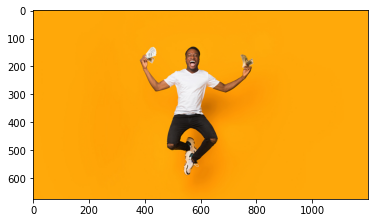

In [9]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));

##1.3 Laod Data

In [10]:
tf.data.Dataset??

In [11]:
tf.keras.utils.image_dataset_from_directory??

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 146 files belonging to 3 classes.


In [14]:
data_iterator = data.as_numpy_iterator() #make us able to iterate throught the data
batch = data_iterator.next() # grab one batch back
# Images represeted as nupmy arrays
len(batch),batch[0].shape #(image , batch),

(2, (32, 256, 256, 3))

In [15]:
batch[1]  # (1=happy ,2= sad)

array([1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1], dtype=int32)

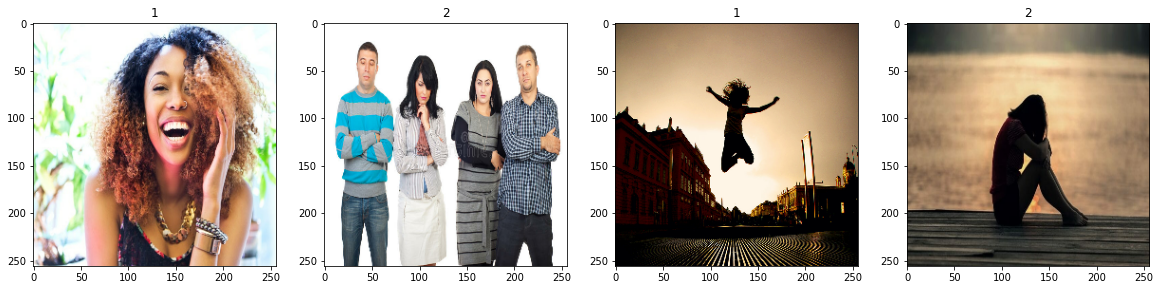

In [16]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

#2. Preprocess Data

##2.1 Scale Data
Scaling the data to `0 to 1` instead of `0 to 255` 


In [17]:
batch[0].min(),batch[0].max()

(0.0, 255.0)

In [18]:
(batch[0]/255).max() # we will do the same

1.0

In [19]:
data = data.map(lambda x,y : (x/255,y)) # there is a problem here and will be deleted soon.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


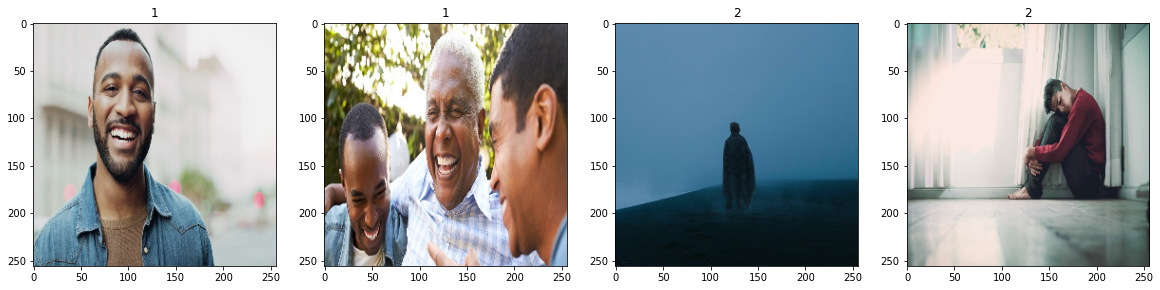

In [20]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img) # make sure you delete dtype(int) here
  ax[idx].title.set_text(batch[1][idx])

##2.2 Split the Data

In [21]:
print(f"We have {len(data)} Patches : Each has 32 images")

We have 5 Patches : Each has 32 images


In [22]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

train_size,val_size,test_size

(3, 2, 1)

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

train,val,test

(<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

#3. Deep Model

##3.1 Build Deep Learning Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [25]:
# you can use this way to create `nn`
'''model = Sequential([
    Conv2d(),

])'''

model = Sequential()

# Adding Layers
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())  # Multipling all together (30*30*16)

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
# Prepating the Loss Function and Optimizer
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##3.2 Train

In [28]:
logdir = '/content/logs'
tensorboard_calback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
tensorboard_calback

In [29]:
# History to be showed&Plotted lated
hist = model.fit(train,epochs=20,validation_data=val,callbacks = [tensorboard_calback])

Epoch 1/20
3/3 [==============================] - 21s 3s/step - loss: -7.6517 - accuracy: 0.5625 - val_loss: -36.7666 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: -70.7281 - accuracy: 0.5104 - val_loss: -146.1201 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: -231.5866 - accuracy: 0.4896 - val_loss: -435.1680 - val_accuracy: 0.4800
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: -484.7778 - accuracy: 0.5417 - val_loss: -769.8948 - val_accuracy: 0.5400
Epoch 5/20
3/3 [==============================] - 6s 1s/step - loss: -1055.3975 - accuracy: 0.5417 - val_loss: -1444.1715 - val_accuracy: 0.5800
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: -1913.7555 - accuracy: 0.5521 - val_loss: -3558.9128 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: -4132.0806 - accuracy: 0.5729 - val_loss: -7382.8589 - val_accuracy: 0.4

In [30]:
hist.history

{'loss': [-7.65167236328125,
  -70.7280502319336,
  -231.58660888671875,
  -484.7778015136719,
  -1055.3974609375,
  -1913.7554931640625,
  -4132.08056640625,
  -7758.32861328125,
  -16046.8681640625,
  -23996.423828125,
  -43599.12109375,
  -66214.8203125,
  -110367.2265625,
  -153307.984375,
  -227118.390625,
  -332118.5625,
  -540891.8125,
  -812523.3125,
  -1070895.25,
  -1414851.625],
 'accuracy': [0.5625,
  0.5104166865348816,
  0.4895833432674408,
  0.5416666865348816,
  0.5416666865348816,
  0.5520833134651184,
  0.5729166865348816,
  0.5208333134651184,
  0.4895833432674408,
  0.5208333134651184,
  0.4895833432674408,
  0.5208333134651184,
  0.5104166865348816,
  0.5625,
  0.5729166865348816,
  0.5520833134651184,
  0.53125,
  0.4895833432674408,
  0.5416666865348816,
  0.5729166865348816],
 'val_loss': [-36.766632080078125,
  -146.12013244628906,
  -435.16796875,
  -769.8948364257812,
  -1444.1715087890625,
  -3558.912841796875,
  -7382.85888671875,
  -12208.0224609375,
  -20

##3.3 Plot Performance

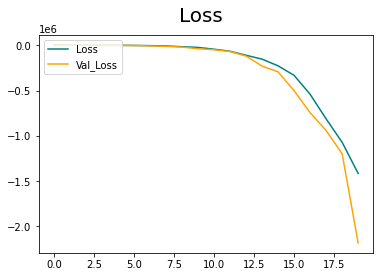

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='Loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val_Loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

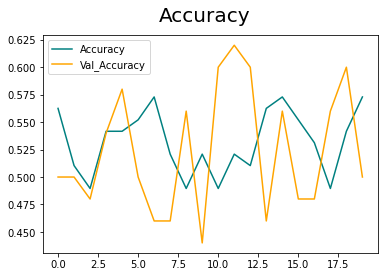

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val_Accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

#4. Evaluate Performance

##4.1 Evaluate

In [33]:
from tensorflow.keras.metrics import Precision , Recall ,BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_datae(y,yhat)
  re.update_datae(y,yhat)
  acc.update_datae(y,yhat)

print(f"Precision: {pre.result().numpy()},Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}")

Precision: 0.0,Recall: 0.0,Accuracy: 0.0


##4.2 Test

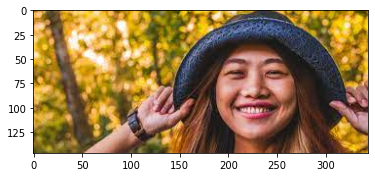

In [43]:
img = cv.imread('/content/happy.jpeg') # put here the image src to show and predict
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.show()

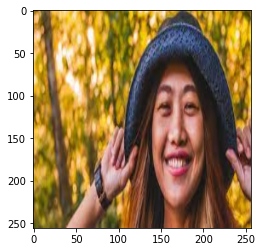

In [44]:
resize = tf.image.resize(cv.cvtColor(img,cv.COLOR_BGR2RGB),(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat= model.predict(np.expand_dims(resize/255,0))
if yhat > 0.5:
  print(f"Predicted class is Sad")
else:
  print(f"Predicted class is Happy")

1/1 [==============================] - 0s 192ms/step
Predicted class is Sad


#5. Save the Model

##5.1 Save he model

In [46]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','happysadmodel.h5'))  # `.h5` --> Serialization

In [47]:
# Reload Model and Predict
new_model = load_model(os.path.join('models','happysadmodel.h5'))
yhat_new  = new_model.predict(np.expand_dims(resize/255,0))
if yhat_new > 0.5:
  print(f"Predicted class is Sad")
else:
  print(f"Predicted class is Happy")

1/1 [==============================] - 0s 138ms/step
Predicted class is Sad
